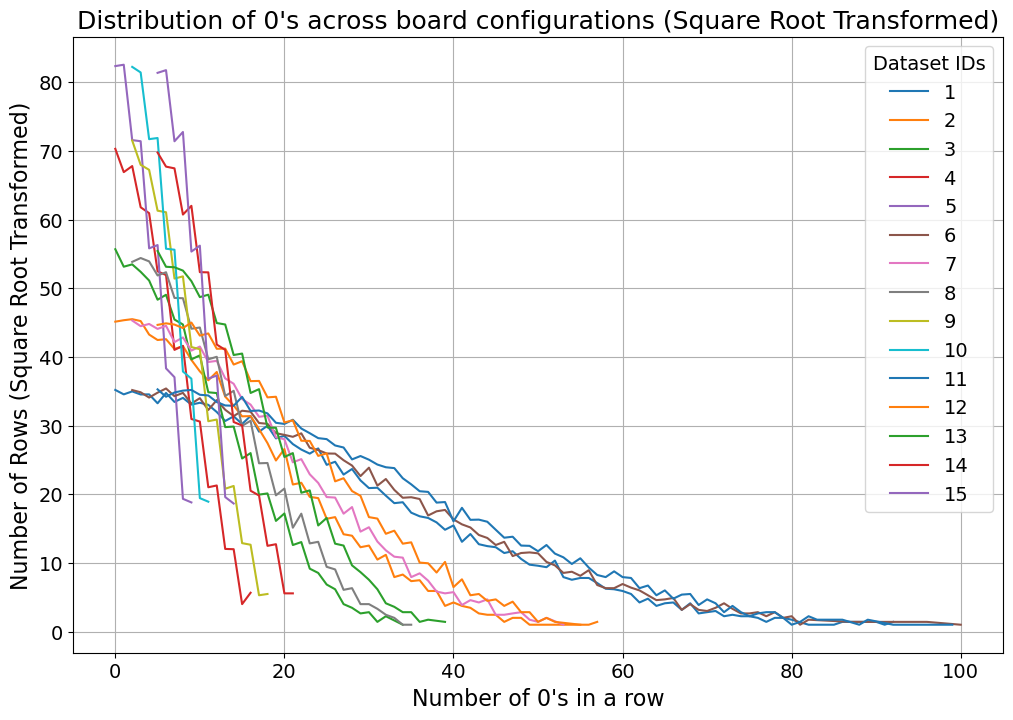

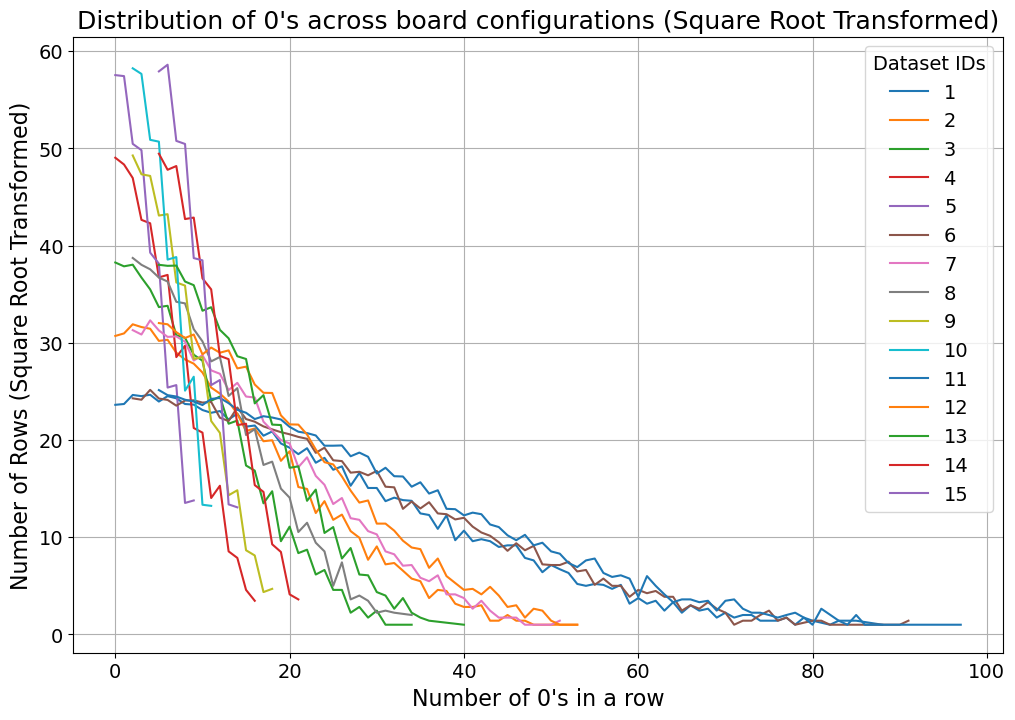

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.font_manager import FontProperties

# Function to load a CSV file and return the distribution of 0's in each row
def get_zero_distribution(file_path):
    data = pd.read_csv(file_path)
    if 'winner' in data.columns:
        grid_data = data.drop(columns=['winner'])
    else:
        grid_data = data
    zero_counts = (grid_data == 0).sum(axis=1)
    distribution = zero_counts.value_counts().sort_index()
    return distribution

# Function to find hex_train.csv and hex_test.csv files within the dataset directory
def find_train_test_files(base_path):
    csv_files = []
    for root, dirs, files in os.walk(base_path):
        for file in files:
            if file == 'hex_train.csv' or file == 'hex_test.csv':
                file_path = os.path.join(root, file)
                folder_id = os.path.basename(os.path.dirname(file_path))  # Get the folder name as ID
                label = folder_id  # Use only the folder ID as label
                csv_files.append((label, file_path))  # Store as a tuple (label, path)
    # Sort csv_files by numeric order of folder_id
    csv_files.sort(key=lambda x: int(x[0]))
    return csv_files

# Base path for dataset directory
base_path = '../dataset'

# Find hex_train.csv and hex_test.csv files
csv_files = find_train_test_files(base_path)

# Separate the files into train and test
train_files = [(label, path) for label, path in csv_files if 'hex_train.csv' in path]
test_files = [(label, path) for label, path in csv_files if 'hex_test.csv' in path]

# Function to plot distributions for a given set of files
def plot_distributions(files, title):
    plt.figure(figsize=(12, 8))
    for label, file_path in files:
        distribution = get_zero_distribution(file_path)
        plt.plot(distribution.index, distribution.values ** 0.5, label=label)  # Square root transformation with label
    
    # Set labels, title, and legend with increased font size (no bold font)
    plt.xlabel("Number of 0's in a row", fontsize=16)
    plt.ylabel("Number of Rows (Square Root Transformed)", fontsize=16)
    plt.title(title, fontsize=18)
    
    # Configure the legend with increased font size (no bold text)
    font_prop = FontProperties(size=14)
    plt.legend(loc="upper right", title="Dataset IDs", title_fontproperties=font_prop, prop=font_prop)
    
    # Increase tick label font size (no bold font)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.grid(True)
    plt.show()

# Plot for hex_train.csv files
plot_distributions(train_files, "Distribution of 0's across board configurations (Square Root Transformed)")

# Plot for hex_test.csv files
plot_distributions(test_files, "Distribution of 0's across board configurations (Square Root Transformed)")


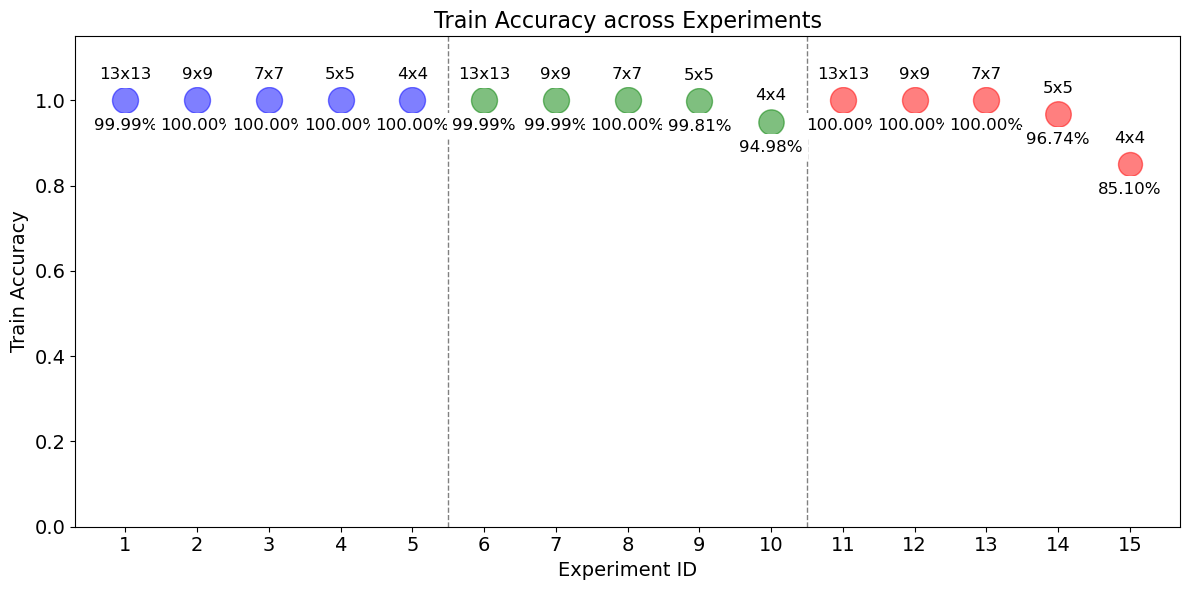

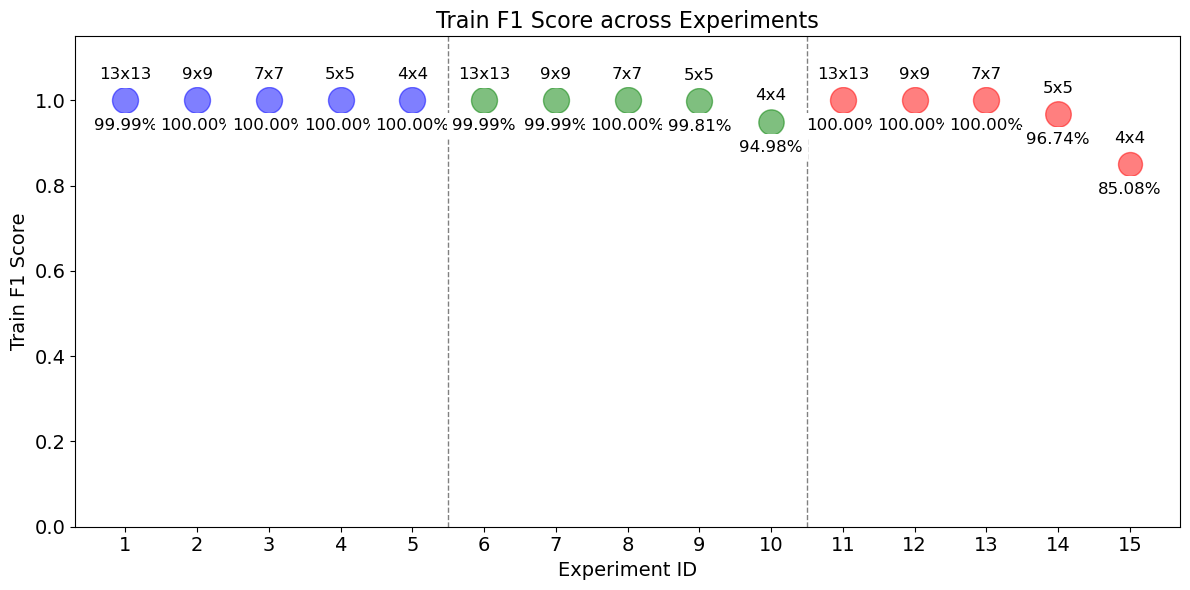

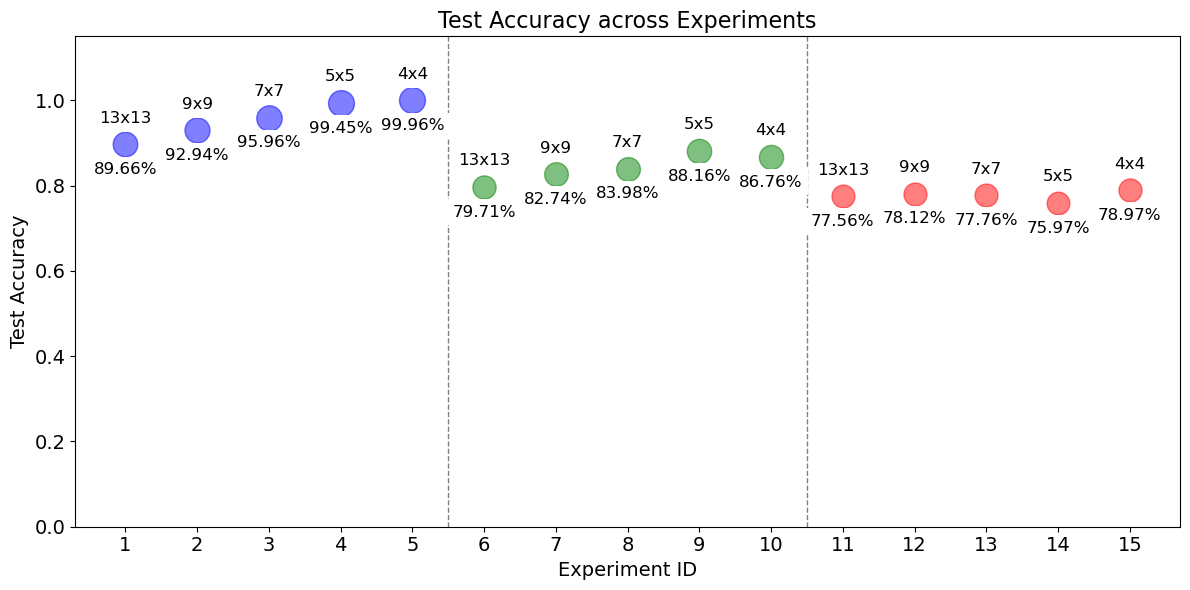

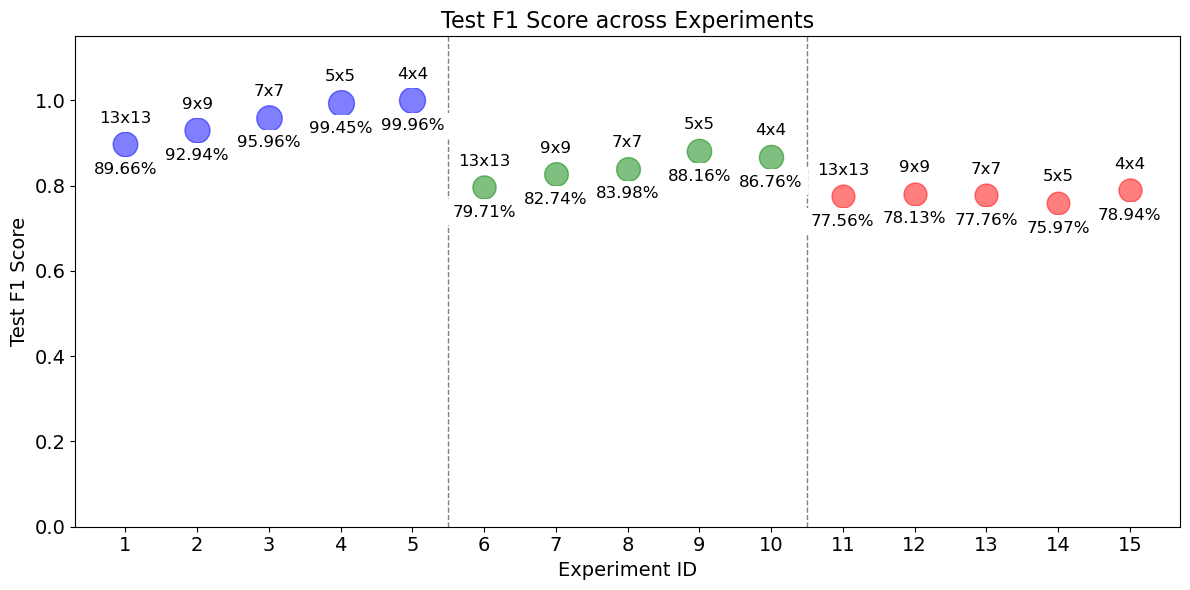

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

# Define the base path and folder structure
base_path = '../dataset'  # Update this to your actual base path
num_experiments = 15

# Lists to hold data for each experiment
train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
experiment_labels = list(range(1, num_experiments + 1))  # Numbers 1 to 15

# Load data from each experiment folder and extract relevant values
for i in range(1, num_experiments + 1):
    folder_path = f"{base_path}/{i}"
    file_path = glob.glob(f"{folder_path}/best_result*.csv")
    if file_path:
        df = pd.read_csv(file_path[0])  # Read the first file that matches
        train_accuracies.append(df['train_accuracy'].iloc[0])
        train_f1_scores.append(df['train_f1_score'].iloc[0])
        test_accuracies.append(df['test_accuracy'].iloc[0])
        test_f1_scores.append(df['test_f1_score'].iloc[0])
    else:
        print(f"No file found in folder {folder_path}")

# Increased bubble size
max_bubble_size = 350

def normalize_bubble_sizes(data):
    max_value = max(data) if data else 1
    return [max_bubble_size * (value / max_value) for value in data]

# Define color sections for the three ranges
colors = ['blue'] * 5 + ['green'] * 5 + ['red'] * 5

# Separator positions
separator_positions = [5.5, 10.5]

# Board sizes according to specified order, repeating every five experiments
board_sizes = ["13x13", "9x9", "7x7", "5x5", "4x4"]
board_labels = [board_sizes[i % 5] for i in range(num_experiments)]

# Text and background settings for improved readability
annotation_font_size = 12
label_font_size = 14
title_font_size = 16
background_color = 'white'

# Plot 1: Train Accuracy (Bubble Chart)
plt.figure(figsize=(12, 6))
bubble_sizes = normalize_bubble_sizes(train_accuracies)
for i in range(num_experiments):
    plt.scatter(i + 1, train_accuracies[i], s=bubble_sizes[i], color=colors[i], alpha=0.5)
    plt.text(i + 1, train_accuracies[i] + 0.05, board_labels[i], ha='center', 
             fontsize=annotation_font_size, bbox=dict(facecolor=background_color, edgecolor='none'))
    plt.text(i + 1, train_accuracies[i] - 0.07, f"{train_accuracies[i]:.2%}", ha='center', 
             fontsize=annotation_font_size, bbox=dict(facecolor=background_color, edgecolor='none'))

for pos in separator_positions:
    plt.axvline(x=pos, color='gray', linestyle='--', linewidth=1)

plt.ylim(0, 1.15)
plt.title("Train Accuracy across Experiments", fontsize=title_font_size)
plt.xlabel("Experiment ID", fontsize=label_font_size)
plt.ylabel("Train Accuracy", fontsize=label_font_size)
plt.xticks(range(1, num_experiments + 1), fontsize=label_font_size)
plt.yticks(fontsize=label_font_size)
plt.tight_layout()
plt.show()

# Plot 2: Train F1 Score (Bubble Chart)
plt.figure(figsize=(12, 6))
bubble_sizes = normalize_bubble_sizes(train_f1_scores)
for i in range(num_experiments):
    plt.scatter(i + 1, train_f1_scores[i], s=bubble_sizes[i], color=colors[i], alpha=0.5)
    plt.text(i + 1, train_f1_scores[i] + 0.05, board_labels[i], ha='center', 
             fontsize=annotation_font_size, bbox=dict(facecolor=background_color, edgecolor='none'))
    plt.text(i + 1, train_f1_scores[i] - 0.07, f"{train_f1_scores[i]:.2%}", ha='center', 
             fontsize=annotation_font_size, bbox=dict(facecolor=background_color, edgecolor='none'))

for pos in separator_positions:
    plt.axvline(x=pos, color='gray', linestyle='--', linewidth=1)

plt.ylim(0, 1.15)
plt.title("Train F1 Score across Experiments", fontsize=title_font_size)
plt.xlabel("Experiment ID", fontsize=label_font_size)
plt.ylabel("Train F1 Score", fontsize=label_font_size)
plt.xticks(range(1, num_experiments + 1), fontsize=label_font_size)
plt.yticks(fontsize=label_font_size)
plt.tight_layout()
plt.show()

# Plot 3: Test Accuracy (Bubble Chart)
plt.figure(figsize=(12, 6))
bubble_sizes = normalize_bubble_sizes(test_accuracies)
for i in range(num_experiments):
    plt.scatter(i + 1, test_accuracies[i], s=bubble_sizes[i], color=colors[i], alpha=0.5)
    plt.text(i + 1, test_accuracies[i] + 0.05, board_labels[i], ha='center', 
             fontsize=annotation_font_size, bbox=dict(facecolor=background_color, edgecolor='none'))
    plt.text(i + 1, test_accuracies[i] - 0.07, f"{test_accuracies[i]:.2%}", ha='center', 
             fontsize=annotation_font_size, bbox=dict(facecolor=background_color, edgecolor='none'))

for pos in separator_positions:
    plt.axvline(x=pos, color='gray', linestyle='--', linewidth=1)

plt.ylim(0, 1.15)
plt.title("Test Accuracy across Experiments", fontsize=title_font_size)
plt.xlabel("Experiment ID", fontsize=label_font_size)
plt.ylabel("Test Accuracy", fontsize=label_font_size)
plt.xticks(range(1, num_experiments + 1), fontsize=label_font_size)
plt.yticks(fontsize=label_font_size)
plt.tight_layout()
plt.show()

# Plot 4: Test F1 Score (Bubble Chart)
plt.figure(figsize=(12, 6))
bubble_sizes = normalize_bubble_sizes(test_f1_scores)
for i in range(num_experiments):
    plt.scatter(i + 1, test_f1_scores[i], s=bubble_sizes[i], color=colors[i], alpha=0.5)
    plt.text(i + 1, test_f1_scores[i] + 0.05, board_labels[i], ha='center', 
             fontsize=annotation_font_size, bbox=dict(facecolor=background_color, edgecolor='none'))
    plt.text(i + 1, test_f1_scores[i] - 0.07, f"{test_f1_scores[i]:.2%}", ha='center', 
             fontsize=annotation_font_size, bbox=dict(facecolor=background_color, edgecolor='none'))

for pos in separator_positions:
    plt.axvline(x=pos, color='gray', linestyle='--', linewidth=1)

plt.ylim(0, 1.15)
plt.title("Test F1 Score across Experiments", fontsize=title_font_size)
plt.xlabel("Experiment ID", fontsize=label_font_size)
plt.ylabel("Test F1 Score", fontsize=label_font_size)
plt.xticks(range(1, num_experiments + 1), fontsize=label_font_size)
plt.yticks(fontsize=label_font_size)
plt.tight_layout()
plt.show()


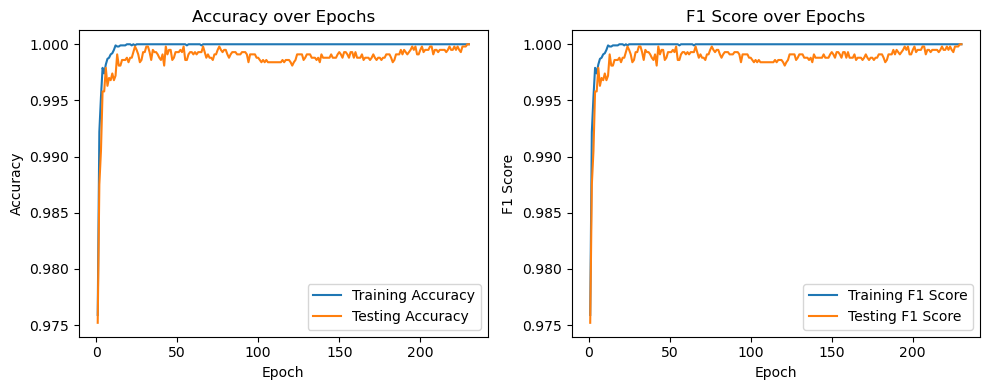

In [43]:
import re
import pandas as pd

# The raw data as a string (replace with the full data if needed)
data = """
=== hyperparameter combination 8 ===
Clauses=430, T=360, s=8, Epochs=300
Initialization of sparse structure.
Epoch 1: Train Acc: 0.9759, Prec: 0.9766, Rec: 0.9759, F1: 0.9759 | Test Acc: 0.9752, Prec: 0.9757, Rec: 0.9752, F1: 0.9752
Misclassified test set indices: [  45  108  311  352  377  511  535  610  688  745  791  809  827  833
  851  854  892  907  920  945  957 1009 1011 1019 1040 1065 1080 1282
 1321 1420 1531 1536 1602 1699 1752 1753 1768 1770 1793 1854 1867 1880
 1918 1929 1970 2012 2015 2058 2144 2145 2156 2252 2275 2277 2296 2315
 2318 2374 2404 2528 2576 2591 2645 2742 2750 2784 2808 2824 2841 2863
 2937 3001 3090 3136 3154 3159 3181 3257 3297 3323 3361 3404 3443 3540
 3564 3569 3657 3679 3771 3847 3850 3852 3904 3906 3953 3962 3987 3997
 4006 4018 4029 4077 4147 4153 4174 4281 4285]
Epoch 2: Train Acc: 0.9922, Prec: 0.9922, Rec: 0.9922, F1: 0.9922 | Test Acc: 0.9875, Prec: 0.9875, Rec: 0.9875, F1: 0.9875
Misclassified test set indices: [  45  281  465  472  535  688  785  791  833  892  907 1065 1097 1223
 1602 1662 1752 1854 1867 1887 2015 2144 2145 2172 2226 2252 2277 2308
 2315 2404 2493 2549 2625 2784 2948 3031 3154 3166 3181 3250 3323 3374
 3404 3420 3482 3540 3657 3771 3904 4021 4029 4147 4153 4228]
Epoch 3: Train Acc: 0.9953, Prec: 0.9953, Rec: 0.9953, F1: 0.9953 | Test Acc: 0.9905, Prec: 0.9905, Rec: 0.9905, F1: 0.9905
Misclassified test set indices: [  45  281  396  548  610  641  785  827 1104 1358 1402 1567 1602 1737
 2015 2144 2252 2315 2374 2456 2493 2549 2603 2625 2648 2716 2784 2813
 3031 3080 3154 3250 3482 3617 3738 3904 3953 4021 4130 4147 4153]
Epoch 4: Train Acc: 0.9979, Prec: 0.9979, Rec: 0.9979, F1: 0.9979 | Test Acc: 0.9958, Prec: 0.9958, Rec: 0.9958, F1: 0.9958
Misclassified test set indices: [   6  548  610  641  833 1602 1793 2015 2493 2625 2784 2917 3031 3636
 3904 4029 4130 4153]
Epoch 5: Train Acc: 0.9974, Prec: 0.9974, Rec: 0.9974, F1: 0.9974 | Test Acc: 0.9958, Prec: 0.9958, Rec: 0.9958, F1: 0.9958
Misclassified test set indices: [   6   45 1065 1097 1793 1997 2015 2144 2308 2493 2625 2638 2784 3904
 4029 4130 4153 4207]
Epoch 6: Train Acc: 0.9982, Prec: 0.9982, Rec: 0.9982, F1: 0.9982 | Test Acc: 0.9979, Prec: 0.9979, Rec: 0.9979, F1: 0.9979
Misclassified test set indices: [   6  551  785 1793 2144 2493 2625 2784 4207]
Epoch 7: Train Acc: 0.9987, Prec: 0.9987, Rec: 0.9987, F1: 0.9987 | Test Acc: 0.9963, Prec: 0.9963, Rec: 0.9963, F1: 0.9963
Misclassified test set indices: [   6  551  688 1139 1358 1793 2015 2128 2493 2625 3031 3771 3904 4029
 4153 4207]
Epoch 8: Train Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988 | Test Acc: 0.9970, Prec: 0.9970, Rec: 0.9970, F1: 0.9970
Misclassified test set indices: [   6   48  688 1536 1567 2015 2493 2625 3166 3904 4029 4207 4228]
Epoch 9: Train Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991 | Test Acc: 0.9968, Prec: 0.9968, Rec: 0.9968, F1: 0.9968
Misclassified test set indices: [   6  610  688  791 1793 2252 2404 2493 3154 3404 3771 3904 4029 4153]
Epoch 10: Train Acc: 0.9992, Prec: 0.9992, Rec: 0.9992, F1: 0.9992 | Test Acc: 0.9974, Prec: 0.9975, Rec: 0.9974, F1: 0.9974
Misclassified test set indices: [   6  688 1539 1737 1793 2015 2144 2252 3904 4029 4153]
Epoch 11: Train Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995 | Test Acc: 0.9968, Prec: 0.9968, Rec: 0.9968, F1: 0.9968
Misclassified test set indices: [   6   45  610 2015 2144 2252 2404 2493 3085 3166 3566 3771 3904 4029]
Epoch 12: Train Acc: 0.9999, Prec: 0.9999, Rec: 0.9999, F1: 0.9999 | Test Acc: 0.9972, Prec: 0.9972, Rec: 0.9972, F1: 0.9972
Misclassified test set indices: [   6  549  827 1097 1539 1793 2015 2144 2252 3166 3904 3953]
Epoch 13: Train Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [   6 1097 1793 2144]
Epoch 14: Train Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998 | Test Acc: 0.9981, Prec: 0.9981, Rec: 0.9981, F1: 0.9981
Misclassified test set indices: [   6  688  776 1567 1793 2144 2252 2493]
Epoch 15: Train Acc: 0.9999, Prec: 0.9999, Rec: 0.9999, F1: 0.9999 | Test Acc: 0.9981, Prec: 0.9981, Rec: 0.9981, F1: 0.9981
Misclassified test set indices: [ 549  827 1539 1567 1793 2493 3953 4147]
Epoch 16: Train Acc: 0.9999, Prec: 0.9999, Rec: 0.9999, F1: 0.9999 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [1539 2144 2493 3154 3166 3540]
Epoch 17: Train Acc: 0.9999, Prec: 0.9999, Rec: 0.9999, F1: 0.9999 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [ 827 1539 1793 2252 2493 3154]
Epoch 18: Train Acc: 0.9999, Prec: 0.9999, Rec: 0.9999, F1: 0.9999 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [   6 1358 1539 1793 2493 3154]
Epoch 19: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1539 1793 2252 2493]
Epoch 20: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9984, Prec: 0.9984, Rec: 0.9984, F1: 0.9984
Misclassified test set indices: [ 549  827 1539 1793 2493 2835 3569]
Epoch 21: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [1358 1539 1753 1793 2493]
Epoch 22: Train Acc: 0.9999, Prec: 0.9999, Rec: 0.9999, F1: 0.9999 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [1358 1539 1793 3154 3617]
Epoch 23: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [1358 1539 4153]
Epoch 24: Train Acc: 0.9999, Prec: 0.9999, Rec: 0.9999, F1: 0.9999 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [1539]
Epoch 25: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1793 3154]
Epoch 26: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [   6 1358 1753 1793]
Epoch 27: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9984, Prec: 0.9984, Rec: 0.9984, F1: 0.9984
Misclassified test set indices: [1358 1539 1567 1753 1793 2456 2603]
Epoch 28: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [1539 1753 1793 3154 3166 4153]
Epoch 29: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [1539 1753 1793]
Epoch 30: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [1539 1753 1793]
Epoch 31: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [1793]
Epoch 32: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [1793]
Epoch 33: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [1539 1753 1793]
Epoch 34: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [1358 1539 1567 1793 2456 2603]
Epoch 35: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1539 1793]
Epoch 36: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [1539 1793 2456]
Epoch 37: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [1539 1793 2493]
Epoch 38: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [1539 1793 2493 2700]
Epoch 39: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [   6 1539 1793 2456 2493]
Epoch 40: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [1358 1539 1567 1793 2456 2603]
Epoch 41: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [1358 1539 1793 2456]
Epoch 42: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9981, Prec: 0.9981, Rec: 0.9981, F1: 0.9981
Misclassified test set indices: [   6  833 1793 2252 2456 3771 3904 4029]
Epoch 43: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [1193]
Epoch 44: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [1193 1539 1793 3617]
Epoch 45: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1539 1793]
Epoch 46: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [   6 1539]
Epoch 47: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [1358 1567 1793 2456 2493 3904]
Epoch 48: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [   6 1793 2456 2493 3904]
Epoch 49: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [   6 1793 3904]
Epoch 50: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [   6 1793 3904]
Epoch 51: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [   6 1753 1793]
Epoch 52: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 827 1539]
Epoch 53: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [1539 1793 2456]
Epoch 54: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [1793]
Epoch 55: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [   6  827 1539 1753 1793 3904]
Epoch 56: Train Acc: 0.9999, Prec: 0.9999, Rec: 0.9999, F1: 0.9999 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [   6  827 1793 3904 3953 4207]
Epoch 57: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 827 1753 1793 3953]
Epoch 58: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 827 1793 3617]
Epoch 59: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 827 1793 3953]
Epoch 60: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [   6  827 1793 3617]
Epoch 61: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 827 1539 1793]
Epoch 62: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [   6  827 1793 3154]
Epoch 63: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 827 1539 1793]
Epoch 64: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 827 1097 1793]
Epoch 65: Train Acc: 0.9999, Prec: 0.9999, Rec: 0.9999, F1: 0.9999 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [   6  827 1793]
Epoch 66: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [1793]
Epoch 67: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [1793 3154 3904]
Epoch 68: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1793 2917 3154 3617]
Epoch 69: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 827 1793 3031 3154]
Epoch 70: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1793 3031 3154 3617]
Epoch 71: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1793 3031 3154 3617]
Epoch 72: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [ 827 1793 3031 3617 3904 4029]
Epoch 73: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [1793 3154 3617 3904]
Epoch 74: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [1793 3617 3904 4029]
Epoch 75: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1793 3617]
Epoch 76: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [1793]
Epoch 77: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1793 3617]
Epoch 78: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [1097 1793 3154]
Epoch 79: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1793 3904]
Epoch 80: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1793 3904]
Epoch 81: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 827 1793 2493 3031]
Epoch 82: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1793 2493 3031 4147]
Epoch 83: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 827 1793 2493 3031]
Epoch 84: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 827 1793 2493]
Epoch 85: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 827 1793 2493]
Epoch 86: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 827 1793 4147]
Epoch 87: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 827 1793 2456 4147]
Epoch 88: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 549  827 1793 4147]
Epoch 89: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 549  827 1793 4147]
Epoch 90: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 827 1793 4147]
Epoch 91: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 827 1793 4147]
Epoch 92: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 549  827 1793]
Epoch 93: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 827 1793 2493 4147]
Epoch 94: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9984, Prec: 0.9984, Rec: 0.9984, F1: 0.9984
Misclassified test set indices: [ 827 1097 1793 2493 3031 3904 4147]
Epoch 95: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 827 1793 2493 4147]
Epoch 96: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 827 1793 2493 4147]
Epoch 97: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 827 1793 2493 4147]
Epoch 98: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 827 1793 3031 4147]
Epoch 99: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1793 2493 3904 4147]
Epoch 100: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1539 1793 2493 4147]
Epoch 101: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [ 827 1539 1793 2493 3904 4147]
Epoch 102: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9984, Prec: 0.9984, Rec: 0.9984, F1: 0.9984
Misclassified test set indices: [ 549  827 1539 1793 2493 3904 4147]
Epoch 103: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [ 827 1539 1793 2493 3904 4147]
Epoch 104: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9984, Prec: 0.9984, Rec: 0.9984, F1: 0.9984
Misclassified test set indices: [ 549  827 1539 1793 2493 3904 4147]
Epoch 105: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [ 827 1539 1793 2493 3904 4147]
Epoch 106: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9984, Prec: 0.9984, Rec: 0.9984, F1: 0.9984
Misclassified test set indices: [ 827 1539 1793 2493 3031 3904 4147]
Epoch 107: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9984, Prec: 0.9984, Rec: 0.9984, F1: 0.9984
Misclassified test set indices: [ 827 1539 1793 2493 3031 3904 4147]
Epoch 108: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9984, Prec: 0.9984, Rec: 0.9984, F1: 0.9984
Misclassified test set indices: [ 827 1539 1793 2493 3031 3904 4147]
Epoch 109: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9984, Prec: 0.9984, Rec: 0.9984, F1: 0.9984
Misclassified test set indices: [ 827 1539 1793 2493 3031 3904 4147]
Epoch 110: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9984, Prec: 0.9984, Rec: 0.9984, F1: 0.9984
Misclassified test set indices: [ 827 1539 1793 2493 3031 3904 4147]
Epoch 111: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9984, Prec: 0.9984, Rec: 0.9984, F1: 0.9984
Misclassified test set indices: [ 827 1539 1793 2493 3031 3904 4147]
Epoch 112: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9984, Prec: 0.9984, Rec: 0.9984, F1: 0.9984
Misclassified test set indices: [ 827 1539 1793 2493 3031 3904 4147]
Epoch 113: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9984, Prec: 0.9984, Rec: 0.9984, F1: 0.9984
Misclassified test set indices: [ 827 1539 1793 2493 3904 4029 4147]
Epoch 114: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9984, Prec: 0.9984, Rec: 0.9984, F1: 0.9984
Misclassified test set indices: [ 827 1539 1793 2493 3904 4029 4147]
Epoch 115: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [ 827 1793 2493 3617 3904 4147]
Epoch 116: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9984, Prec: 0.9984, Rec: 0.9984, F1: 0.9984
Misclassified test set indices: [ 827 1097 1793 3031 3904 4029 4147]
Epoch 117: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [ 827 1539 1793 3617 3904 4147]
Epoch 118: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [1539 1793 2015 3617 3904 4029]
Epoch 119: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [1793 2015 3031 3617 3904 4029]
Epoch 120: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9984, Prec: 0.9984, Rec: 0.9984, F1: 0.9984
Misclassified test set indices: [ 827 1539 1793 2493 3031 3904 4029]
Epoch 121: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9981, Prec: 0.9981, Rec: 0.9981, F1: 0.9981
Misclassified test set indices: [ 827 1539 1793 2015 2493 3031 3904 4029]
Epoch 122: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9984, Prec: 0.9984, Rec: 0.9984, F1: 0.9984
Misclassified test set indices: [ 827 1539 1793 2493 3031 3904 4029]
Epoch 123: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [ 827 1539 1793 2493 3031 3904]
Epoch 124: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 827 1793 2493 3031]
Epoch 125: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 827 1793 2493 3031]
Epoch 126: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 827 1793 2493 3031]
Epoch 127: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 827 1793 2493 3031]
Epoch 128: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [ 827 1793 2493 3031 3154 3617]
Epoch 129: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1793 2493 3031 3617]
Epoch 130: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 827 1793 2493 3617]
Epoch 131: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 827 1793 2493 3617]
Epoch 132: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 827 1793 2493 4147]
Epoch 133: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1539 1793 2493 3031]
Epoch 134: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1539 1793 2493 3031]
Epoch 135: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1539 1793 2493 3031]
Epoch 136: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [ 827 1539 1793 2493 3031 3904]
Epoch 137: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1539 2493 3031 3904]
Epoch 138: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9984, Prec: 0.9984, Rec: 0.9984, F1: 0.9984
Misclassified test set indices: [ 827 1539 1793 2493 3031 3904 4153]
Epoch 139: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 827 1793 2493 3031]
Epoch 140: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1539 1793 2493 3031]
Epoch 141: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1539 1793 2493 3031]
Epoch 142: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1539 1793 2493 3031]
Epoch 143: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1539 1793 2493 3031]
Epoch 144: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1539 1793 2493 3031]
Epoch 145: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 827 1793 2493 3031]
Epoch 146: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1539 1793 2493 3031]
Epoch 147: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1539 1793 2493 3031]
Epoch 148: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1539 1793 2493 3031]
Epoch 149: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 827 1793 2493 3031]
Epoch 150: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 827 1793 3031]
Epoch 151: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 827 1793 2493 3031]
Epoch 152: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1539 2493 3031 4147]
Epoch 153: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 827 2493 3031]
Epoch 154: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 827 2493 4029]
Epoch 155: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 827 1539 2493 3031]
Epoch 156: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1539 2493 3031 4029]
Epoch 157: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 827 1539 2493]
Epoch 158: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 827 1539 2493]
Epoch 159: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [   6  827 1539 1567 2493]
Epoch 160: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 827 1539 1567]
Epoch 161: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1539 1567 2493 3154]
Epoch 162: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1539 1567 2493 3031]
Epoch 163: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1539 1567 2493 3031]
Epoch 164: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 827 1567 2493 3031]
Epoch 165: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [ 827 1539 1567 1793 2493 3031]
Epoch 166: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1539 1567 2493 3031]
Epoch 167: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1539 1793 2493 3031]
Epoch 168: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1539 1567 2493 3031]
Epoch 169: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [ 827 1539 1793 2493 3031 3154]
Epoch 170: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1539 1793 3031 3154]
Epoch 171: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 827 1539 2493 3031]
Epoch 172: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1539 1567 2493 3031]
Epoch 173: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [ 827 1539 1567 2493 3031 3154]
Epoch 174: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1539 2493 3031 3154]
Epoch 175: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1539 2493 3031 3154]
Epoch 176: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [ 827 1539 1567 2493 3031 3154]
Epoch 177: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1539 2493 3031 3154]
Epoch 178: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 549  827 1539 2493 3154]
Epoch 179: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 827 1539 2493 3154]
Epoch 180: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 827 1539 2493 3154]
Epoch 181: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 827 1539 2493 3771]
Epoch 182: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 827 1539 1567 2493 4153]
Epoch 183: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9984, Prec: 0.9984, Rec: 0.9984, F1: 0.9984
Misclassified test set indices: [ 827 1539 1567 1793 2493 3031 4153]
Epoch 184: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [1793 2144 2493 3031 3771 4153]
Epoch 185: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [1539 1793 2493 3031]
Epoch 186: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [1539 1793 2493 3031]
Epoch 187: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [1539 1793 2493 3031]
Epoch 188: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1793 3031]
Epoch 189: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [1539 1793 2493 3031]
Epoch 190: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1793 2493]
Epoch 191: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [1539 1793 2493]
Epoch 192: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [1539 1793 2493 3031]
Epoch 193: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [1539 1793 2493]
Epoch 194: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1793 2493]
Epoch 195: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [1793]
Epoch 196: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1793 3154]
Epoch 197: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3154]
Epoch 198: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [1793 3154 3904 4147]
Epoch 199: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [1793 3181 3904 4147]
Epoch 200: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1793 4147]
Epoch 201: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [1793]
Epoch 202: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [1793 3031 3181]
Epoch 203: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1793 3031]
Epoch 204: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1793 3031]
Epoch 205: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1793 3031]
Epoch 206: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [1793]
Epoch 207: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [1793]
Epoch 208: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [1539 1793 2456 2493]
Epoch 209: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1539 1793]
Epoch 210: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1539 1793]
Epoch 211: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [1539 1793 2493]
Epoch 212: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1539 2493]
Epoch 213: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1539 1793]
Epoch 214: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1539 1793]
Epoch 215: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1539 1793]
Epoch 216: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [1793 2493 3617]
Epoch 217: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1793 3617]
Epoch 218: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3617]
Epoch 219: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1539 3617]
Epoch 220: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1793 3617]
Epoch 221: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3617]
Epoch 222: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1793 3617]
Epoch 223: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3617]
Epoch 224: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [3617 4147]
Epoch 225: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [1539 3617 4147]
Epoch 226: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3617]
Epoch 227: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3617]
Epoch 228: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3617]
Epoch 229: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000
All test samples correctly classified.
Epoch 230: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000
All test samples correctly classified.
"""

# Use regex to capture Train/Test Acc and F1 scores
pattern = re.compile(
    r"Epoch (\d+): Train Acc: ([\d.]+), Prec: [\d.]+, Rec: [\d.]+, F1: ([\d.]+) \| Test Acc: ([\d.]+), Prec: [\d.]+, Rec: [\d.]+, F1: ([\d.]+)"
)

# Extract data and store in a list of dictionaries
results = []
for match in pattern.finditer(data):
    epoch = int(match.group(1))
    train_acc = float(match.group(2))
    train_f1 = float(match.group(3))
    test_acc = float(match.group(4))
    test_f1 = float(match.group(5))
    
    results.append({
        "Epoch": epoch,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "F1 Train": train_f1,
        "F1 Test": test_f1
    })

# Convert results to a DataFrame
df = pd.DataFrame(results)

# Plot Accuracy over Epochs
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(df['Epoch'], df['Train Accuracy'], label='Training Accuracy')
plt.plot(df['Epoch'], df['Test Accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# Plot F1 Score over Epochs
plt.subplot(1, 2, 2)
plt.plot(df['Epoch'], df['F1 Train'], label='Training F1 Score')
plt.plot(df['Epoch'], df['F1 Test'], label='Testing F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('F1 Score over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


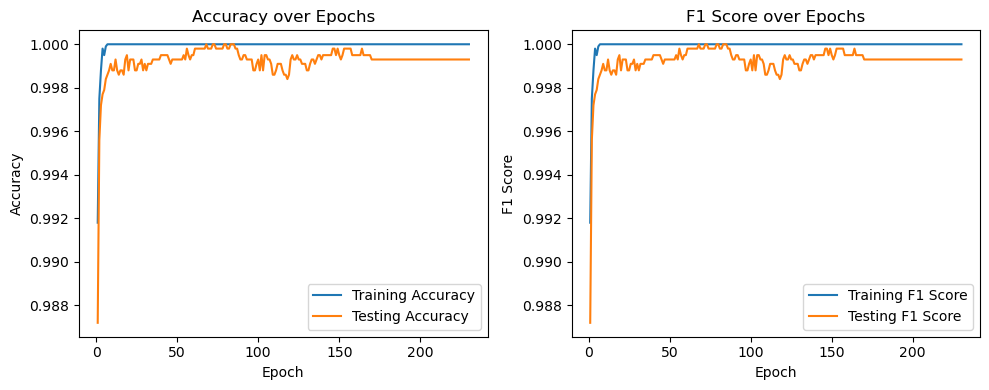

In [44]:
import re
import pandas as pd

# The raw data as a string (replace with the full data if needed)
data = """
=== hyperparameter combination 7 ===
Clauses=530, T=360, s=5, Epochs=300
Initialization of sparse structure.
Epoch 1: Train Acc: 0.9918, Prec: 0.9918, Rec: 0.9918, F1: 0.9918 | Test Acc: 0.9872, Prec: 0.9872, Rec: 0.9872, F1: 0.9872
Misclassified test set indices: [  45  118  141  177  240  281  328  376  483  693  697  748  805  850
  886  893  931 1031 1098 1296 1315 1480 1497 1527 1699 1744 1841 1845
 1889 2003 2070 2256 2281 2299 2855 2859 2865 3104 3203 3300 3304 3326
 3352 3378 3393 3416 3516 3800 3809 3901 3953 3971 4112 4176 4272]
Epoch 2: Train Acc: 0.9975, Prec: 0.9975, Rec: 0.9975, F1: 0.9975 | Test Acc: 0.9956, Prec: 0.9956, Rec: 0.9956, F1: 0.9956
Misclassified test set indices: [  45  141  693  850  886  931 1098 1297 1643 1933 2281 2283 2299 2410
 3033 3393 3800 3914 3971]
Epoch 3: Train Acc: 0.9988, Prec: 0.9989, Rec: 0.9988, F1: 0.9988 | Test Acc: 0.9972, Prec: 0.9972, Rec: 0.9972, F1: 0.9972
Misclassified test set indices: [ 241  281  850  886  931 1098 2283 2410 2818 2865 3033 3565]
Epoch 4: Train Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998 | Test Acc: 0.9977, Prec: 0.9977, Rec: 0.9977, F1: 0.9977
Misclassified test set indices: [  45  931 1297 2299 2410 2818 3393 3565 3953 4272]
Epoch 5: Train Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995 | Test Acc: 0.9979, Prec: 0.9979, Rec: 0.9979, F1: 0.9979
Misclassified test set indices: [ 281  931 2283 2410 3352 3800 3914 3971 4112]
Epoch 6: Train Acc: 0.9999, Prec: 0.9999, Rec: 0.9999, F1: 0.9999 | Test Acc: 0.9984, Prec: 0.9984, Rec: 0.9984, F1: 0.9984
Misclassified test set indices: [ 931 1315 2299 2410 2865 3140 3393]
Epoch 7: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [ 850  931 1315 2410 3352 3393]
Epoch 8: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 281  931 2410 3203 3352]
Epoch 9: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 281  931 2818 3565]
Epoch 10: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 281  850  931 1297 3140]
Epoch 11: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 281  850  931 3140 3352]
Epoch 12: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 281  931 3352]
Epoch 13: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 281  886  931 3140 3352]
Epoch 14: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [ 281  931 3140 3352 3378 4272]
Epoch 15: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 281  931 3140 3203 3352]
Epoch 16: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 281  931 2410 3140 4272]
Epoch 17: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [ 281  850  931 2410 3140 3203]
Epoch 18: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 931 2410 3140]
Epoch 19: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 931 3352]
Epoch 20: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 281  931 3140 3203 3352]
Epoch 21: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 931 2410 3140]
Epoch 22: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 931 2410 3140]
Epoch 23: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 931 2410 3140]
Epoch 24: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 931 2410 2865 3140 4272]
Epoch 25: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 931 2410 3140 3203 4272]
Epoch 26: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 931 3140 3203 4272]
Epoch 27: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 281  931 3140 3203]
Epoch 28: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 931 1297 3140]
Epoch 29: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 281  931 1297 2410 3140]
Epoch 30: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 281  931 1297 3140]
Epoch 31: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 281  931 1297 2410 3140]
Epoch 32: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 281  931 1297 3140]
Epoch 33: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 281  931 1297 3140]
Epoch 34: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 281  931 1297 3140]
Epoch 35: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 281  931 3140]
Epoch 36: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 281  931 3140]
Epoch 37: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 281  931 3140]
Epoch 38: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 281  931 3140]
Epoch 39: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 281  931 3140]
Epoch 40: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 931 3140]
Epoch 41: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 931 3140]
Epoch 42: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 931 3140]
Epoch 43: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 931 3140]
Epoch 44: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1297 3140]
Epoch 45: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 931 1297 3140]
Epoch 46: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 281  931 1297 3140]
Epoch 47: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 931 1297 3140]
Epoch 48: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 281  931 3140]
Epoch 49: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 281  931 3140]
Epoch 50: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 281  931 3140]
Epoch 51: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 281  931 3140]
Epoch 52: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 281  931 3140]
Epoch 53: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 281  931 3140]
Epoch 54: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 931 3140]
Epoch 55: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 281  931 3140]
Epoch 56: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [931]
Epoch 57: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [327 931]
Epoch 58: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327  931 3140]
Epoch 59: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 931 3140]
Epoch 60: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 931 3140]
Epoch 61: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [931]
Epoch 62: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [931]
Epoch 63: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [931]
Epoch 64: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [931]
Epoch 65: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [2410]
Epoch 66: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [931]
Epoch 67: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [931]
Epoch 68: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000
All test samples correctly classified.
Epoch 69: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [327]
Epoch 70: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3203]
Epoch 71: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3203]
Epoch 72: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000
All test samples correctly classified.
Epoch 73: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000
All test samples correctly classified.
Epoch 74: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3203]
Epoch 75: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3203]
Epoch 76: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [327]
Epoch 77: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3203]
Epoch 78: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3203]
Epoch 79: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000
All test samples correctly classified.
Epoch 80: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000
All test samples correctly classified.
Epoch 81: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [931]
Epoch 82: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [931]
Epoch 83: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000
All test samples correctly classified.
Epoch 84: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000
All test samples correctly classified.
Epoch 85: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000
All test samples correctly classified.
Epoch 86: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [2299]
Epoch 87: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [2299]
Epoch 88: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 281 3140]
Epoch 89: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 281  931 2299]
Epoch 90: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 281  931 2299]
Epoch 91: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 931 2299]
Epoch 92: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 931 2299]
Epoch 93: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 931 2299 3140]
Epoch 94: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 931 3140 3943]
Epoch 95: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 281 2299 3140]
Epoch 96: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 281  327 2299]
Epoch 97: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 281  327  931 2299 3140]
Epoch 98: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 281  327  931 2299 3140]
Epoch 99: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 327  931 3140 3352]
Epoch 100: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 281 3140 3352]
Epoch 101: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 281  931 2299 3140 3352]
Epoch 102: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 281 3140]
Epoch 103: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 281  327 2299 3140 3352]
Epoch 104: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 327 3140]
Epoch 105: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 327 3140]
Epoch 106: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 281  327 3140]
Epoch 107: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 281  327 3140]
Epoch 108: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 281  327 3140 3352]
Epoch 109: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [ 281  327 3140 3203 3352 4272]
Epoch 110: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [ 281  327 3140 3203 3352 4272]
Epoch 111: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 281  327 3140 3352 4272]
Epoch 112: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 281  327 3140 4272]
Epoch 113: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 281  327 3140 4272]
Epoch 114: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 281  327 3140 4272]
Epoch 115: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 281  327  931 3140 4272]
Epoch 116: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [ 281  327  931 2299 3140 4272]
Epoch 117: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [ 281  327  931 3140 3352 4272]
Epoch 118: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9984, Prec: 0.9984, Rec: 0.9984, F1: 0.9984
Misclassified test set indices: [ 281  327 2299 3140 3203 3352 4272]
Epoch 119: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [ 281  327 2299 3140 3203 4272]
Epoch 120: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 121: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [3140 4272]
Epoch 122: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 281 3140 3203]
Epoch 123: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [3140 3203 4272]
Epoch 124: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [3140 3203]
Epoch 125: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [3140 3203 4272]
Epoch 126: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 931 3140 3203]
Epoch 127: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 931 3140 3203 4272]
Epoch 128: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 931 3140 3203 4272]
Epoch 129: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 931 3140 3203 3352]
Epoch 130: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 281  931 3140 3203 3352]
Epoch 131: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 281 3140 3203 3352 4272]
Epoch 132: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 281 3140 3203 4272]
Epoch 133: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [3140 3203 4272]
Epoch 134: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [3140 3203 4272]
Epoch 135: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9991, Prec: 0.9991, Rec: 0.9991, F1: 0.9991
Misclassified test set indices: [ 327 3140 3203 4272]
Epoch 136: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 3203]
Epoch 137: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 327 3140]
Epoch 138: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 327 3140]
Epoch 139: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 140: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 327 3140]
Epoch 141: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 327 3140]
Epoch 142: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 327 3140]
Epoch 143: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 327 3140]
Epoch 144: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 327 3140]
Epoch 145: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 327 3140]
Epoch 146: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3140]
Epoch 147: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3140]
Epoch 148: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 327 3140]
Epoch 149: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3140]
Epoch 150: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 327 3140]
Epoch 151: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 152: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [3140 4272]
Epoch 153: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3140]
Epoch 154: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3140]
Epoch 155: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3140]
Epoch 156: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3140]
Epoch 157: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3140]
Epoch 158: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [3140 4272]
Epoch 159: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [3140 4272]
Epoch 160: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [3140 4272]
Epoch 161: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [3140 4272]
Epoch 162: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [3140 4272]
Epoch 163: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [3140 4272]
Epoch 164: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3140]
Epoch 165: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [3140 4272]
Epoch 166: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [3140 4272]
Epoch 167: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [3140 4272]
Epoch 168: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [3140 4272]
Epoch 169: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [3140 4272]
Epoch 170: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 171: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 172: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 173: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 174: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 175: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 176: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 177: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 178: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 179: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 180: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 181: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 182: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 183: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 184: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 185: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 186: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 187: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 188: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 189: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 190: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 191: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 192: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 193: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 194: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 195: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 196: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 197: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 198: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 199: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 200: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 201: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 202: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 203: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 204: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 205: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 206: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 207: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 208: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 209: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 210: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 211: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 212: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 213: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 214: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 215: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 216: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 217: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 218: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 219: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 220: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 221: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 222: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 223: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 224: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 225: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 226: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 227: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 228: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 229: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
Epoch 230: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 327 3140 4272]
"""

# Use regex to capture Train/Test Acc and F1 scores
pattern = re.compile(
    r"Epoch (\d+): Train Acc: ([\d.]+), Prec: [\d.]+, Rec: [\d.]+, F1: ([\d.]+) \| Test Acc: ([\d.]+), Prec: [\d.]+, Rec: [\d.]+, F1: ([\d.]+)"
)

# Extract data and store in a list of dictionaries
results = []
for match in pattern.finditer(data):
    epoch = int(match.group(1))
    train_acc = float(match.group(2))
    train_f1 = float(match.group(3))
    test_acc = float(match.group(4))
    test_f1 = float(match.group(5))
    
    results.append({
        "Epoch": epoch,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "F1 Train": train_f1,
        "F1 Test": test_f1
    })

# Convert results to a DataFrame
df = pd.DataFrame(results)

# Plot Accuracy over Epochs
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(df['Epoch'], df['Train Accuracy'], label='Training Accuracy')
plt.plot(df['Epoch'], df['Test Accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# Plot F1 Score over Epochs
plt.subplot(1, 2, 2)
plt.plot(df['Epoch'], df['F1 Train'], label='Training F1 Score')
plt.plot(df['Epoch'], df['F1 Test'], label='Testing F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('F1 Score over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


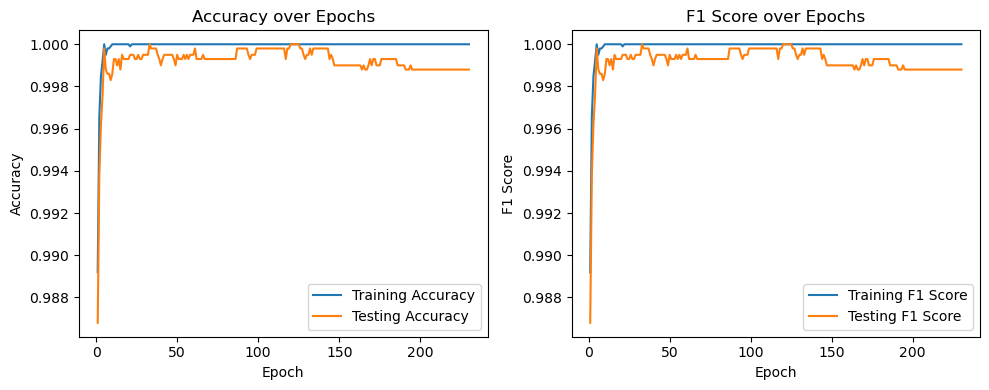

In [45]:
import re
import pandas as pd

# The raw data as a string (replace with the full data if needed)
data = """
=== hyperparameter combination 4 ===
Clauses=430, T=340, s=5, Epochs=300
Initialization of sparse structure.
Epoch 1: Train Acc: 0.9892, Prec: 0.9893, Rec: 0.9892, F1: 0.9892 | Test Acc: 0.9868, Prec: 0.9869, Rec: 0.9868, F1: 0.9868
Misclassified test set indices: [  49   57  531  549  561  582  607  615  691  738  742 1047 1163 1289
 1356 1370 1431 1647 1695 1763 1790 1792 1949 1968 2051 2067 2109 2257
 2466 2478 2516 2693 2850 2871 2877 2891 2910 2983 2997 3025 3246 3273
 3282 3366 3513 3537 3633 3757 3760 3836 3837 3841 3843 3919 4100]
Epoch 2: Train Acc: 0.9966, Prec: 0.9966, Rec: 0.9966, F1: 0.9966 | Test Acc: 0.9938, Prec: 0.9938, Rec: 0.9938, F1: 0.9938
Misclassified test set indices: [ 239  278  423  549  615  691  993 1047 1165 1431 1601 1623 1674 1909
 2015 2238 2745 2877 2910 3760 3781 3841 3858 3904 4100 4145]
Epoch 3: Train Acc: 0.9985, Prec: 0.9985, Rec: 0.9985, F1: 0.9985 | Test Acc: 0.9962, Prec: 0.9962, Rec: 0.9962, F1: 0.9962
Misclassified test set indices: [  57  239  270  278  531 1431 1741 2015 2745 3246 3379 3513 3569 3760
 3904 4100]
Epoch 4: Train Acc: 0.9992, Prec: 0.9992, Rec: 0.9992, F1: 0.9992 | Test Acc: 0.9976, Prec: 0.9976, Rec: 0.9976, F1: 0.9976
Misclassified test set indices: [ 239  270  278 1047 1431 2015 2745 3246 3513 3904]
Epoch 5: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3246]
Epoch 6: Train Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [ 531 1119 1431 3513 3633]
Epoch 7: Train Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [  57  239 1119 1431 2516 3904]
Epoch 8: Train Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [  57  239  270 1431 3246 3904]
Epoch 9: Train Acc: 0.9999, Prec: 0.9999, Rec: 0.9999, F1: 0.9999 | Test Acc: 0.9983, Prec: 0.9983, Rec: 0.9983, F1: 0.9983
Misclassified test set indices: [  57  129  239  270 1431 3246 3904]
Epoch 10: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9986, Prec: 0.9986, Rec: 0.9986, F1: 0.9986
Misclassified test set indices: [  57  239 1431 3501 3513 3633]
Epoch 11: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  57  270 1356]
Epoch 12: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  57 1119 3513]
Epoch 13: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  57 1356 2745 3904]
Epoch 14: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  57 1356 3883]
Epoch 15: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  57  423  893 1356 3633]
Epoch 16: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1356 3633]
Epoch 17: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  57 1356 3883]
Epoch 18: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  57 1356 3883]
Epoch 19: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  57  278 1356]
Epoch 20: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  57  239 1356]
Epoch 21: Train Acc: 0.9999, Prec: 0.9999, Rec: 0.9999, F1: 0.9999 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 423 1356]
Epoch 22: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1356 3633]
Epoch 23: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [1356 3633]
Epoch 24: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  57 1356 2015]
Epoch 25: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  57 1356 3633]
Epoch 26: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [  57 1356]
Epoch 27: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  57 1356 3633]
Epoch 28: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  57 1356 3633]
Epoch 29: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [  57 1356]
Epoch 30: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [  57 3883]
Epoch 31: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [  57 1356]
Epoch 32: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [  57 3883]
Epoch 33: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000
All test samples correctly classified.
Epoch 34: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [57]
Epoch 35: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [57]
Epoch 36: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [57]
Epoch 37: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [57]
Epoch 38: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 57 239]
Epoch 39: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  57  239 1431]
Epoch 40: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  57  239 1431 3633]
Epoch 41: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  57 1356 3633]
Epoch 42: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [  57 3883]
Epoch 43: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [  57 1356]
Epoch 44: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [  57 1356]
Epoch 45: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [  57 1356]
Epoch 46: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [  57 3883]
Epoch 47: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [  57 3633]
Epoch 48: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  57 3633 3883]
Epoch 49: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19   57 3633 3883]
Epoch 50: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [  57 3883]
Epoch 51: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19   57 3883]
Epoch 52: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  57 1356 3883]
Epoch 53: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  57 1356 3883]
Epoch 54: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [  57 3883]
Epoch 55: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19   57 3883]
Epoch 56: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [  57 3883]
Epoch 57: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19   57 3883]
Epoch 58: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [  57 3883]
Epoch 59: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [19 57]
Epoch 60: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [19 57]
Epoch 61: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [57]
Epoch 62: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19   57 3883]
Epoch 63: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19   57 3883]
Epoch 64: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19   57 3883]
Epoch 65: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19   57 3883]
Epoch 66: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [  57 3883]
Epoch 67: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19   57 3883]
Epoch 68: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19   57 3883]
Epoch 69: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19   57 3883]
Epoch 70: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19   57 3883]
Epoch 71: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19   57 3883]
Epoch 72: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19   57 3883]
Epoch 73: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19   57 3883]
Epoch 74: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19   57 3883]
Epoch 75: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19   57 3883]
Epoch 76: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19  129 3883]
Epoch 77: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19   57 3883]
Epoch 78: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19   57 3883]
Epoch 79: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19   57 3883]
Epoch 80: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19   57 3883]
Epoch 81: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19   57 3883]
Epoch 82: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19   57 3883]
Epoch 83: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19   57 3883]
Epoch 84: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19   57 3883]
Epoch 85: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19   57 3883]
Epoch 86: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19   57 3883]
Epoch 87: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3883]
Epoch 88: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3883]
Epoch 89: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3883]
Epoch 90: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3883]
Epoch 91: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3883]
Epoch 92: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3883]
Epoch 93: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [3883]
Epoch 94: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [  19 3883]
Epoch 95: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19   57 3883]
Epoch 96: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [  57 3883]
Epoch 97: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [  57 3883]
Epoch 98: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [  57 3883]
Epoch 99: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [57]
Epoch 100: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [57]
Epoch 101: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [57]
Epoch 102: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [57]
Epoch 103: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [57]
Epoch 104: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [57]
Epoch 105: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [57]
Epoch 106: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [57]
Epoch 107: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [57]
Epoch 108: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [57]
Epoch 109: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [57]
Epoch 110: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [57]
Epoch 111: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [57]
Epoch 112: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [57]
Epoch 113: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [57]
Epoch 114: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [57]
Epoch 115: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [57]
Epoch 116: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [57]
Epoch 117: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19   57 3883]
Epoch 118: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [57]
Epoch 119: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [57]
Epoch 120: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000
All test samples correctly classified.
Epoch 121: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000
All test samples correctly classified.
Epoch 122: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000
All test samples correctly classified.
Epoch 123: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000
All test samples correctly classified.
Epoch 124: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000
All test samples correctly classified.
Epoch 125: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000
All test samples correctly classified.
Epoch 126: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [19]
Epoch 127: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [19]
Epoch 128: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [  19 1431]
Epoch 129: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19  423 1431]
Epoch 130: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 19 423]
Epoch 131: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 19 423]
Epoch 132: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [19]
Epoch 133: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 19 423]
Epoch 134: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [423]
Epoch 135: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [423]
Epoch 136: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [423]
Epoch 137: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [423]
Epoch 138: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [423]
Epoch 139: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [423]
Epoch 140: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [423]
Epoch 141: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [423]
Epoch 142: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [423]
Epoch 143: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9998, Prec: 0.9998, Rec: 0.9998, F1: 0.9998
Misclassified test set indices: [423]
Epoch 144: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19  423 1431]
Epoch 145: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995
Misclassified test set indices: [ 19 423]
Epoch 146: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [ 19  57 423]
Epoch 147: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19   57  423 3883]
Epoch 148: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19   57  423 3883]
Epoch 149: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19   57  423 3883]
Epoch 150: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19   57  423 3883]
Epoch 151: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19   57  423 3883]
Epoch 152: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19   57  423 3883]
Epoch 153: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19   57  423 3883]
Epoch 154: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19   57  423 3883]
Epoch 155: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19   57  423 3883]
Epoch 156: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19   57  423 3883]
Epoch 157: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19   57  423 3883]
Epoch 158: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19   57  423 3883]
Epoch 159: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19   57  423 3883]
Epoch 160: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19   57  423 3883]
Epoch 161: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19   57  423 3883]
Epoch 162: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19   57  423 3883]
Epoch 163: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19   57  423 3883]
Epoch 164: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19   57  423 1431 3883]
Epoch 165: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19   57  423 3883]
Epoch 166: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19   57  423 1431 3883]
Epoch 167: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19   57  423 1431 3883]
Epoch 168: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19   57  423 3883]
Epoch 169: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19  423 3883]
Epoch 170: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19  423 1431 3883]
Epoch 171: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19  423 3883]
Epoch 172: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19  423 3883]
Epoch 173: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19  423 1431 3883]
Epoch 174: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19  423 1431 3883]
Epoch 175: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19  423 1431 3883]
Epoch 176: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19  423 3883]
Epoch 177: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19  423 3883]
Epoch 178: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19  423 3883]
Epoch 179: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19  423 3883]
Epoch 180: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19  423 3883]
Epoch 181: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19  423 3883]
Epoch 182: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19  423 3883]
Epoch 183: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19  423 3883]
Epoch 184: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19  423 3883]
Epoch 185: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9993, Prec: 0.9993, Rec: 0.9993, F1: 0.9993
Misclassified test set indices: [  19  423 3883]
Epoch 186: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19  423 1431 3883]
Epoch 187: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19  423 1431 3883]
Epoch 188: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19  423 2257 3883]
Epoch 189: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19  423 2257 3883]
Epoch 190: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19  423 2257 3883]
Epoch 191: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 2257 3633 3883]
Epoch 192: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 2257 3633 3883]
Epoch 193: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 2257 3633 3883]
Epoch 194: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9990, Prec: 0.9990, Rec: 0.9990, F1: 0.9990
Misclassified test set indices: [  19  423 3633 3883]
Epoch 195: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 196: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 197: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 198: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 199: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 200: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 201: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 202: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 203: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 204: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 205: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 206: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 207: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 208: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 209: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 210: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 211: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 212: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 213: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 214: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 215: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 216: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 217: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 218: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 219: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 220: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 221: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 222: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 223: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 224: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 225: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 226: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 227: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 228: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 229: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
Epoch 230: Train Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000 | Test Acc: 0.9988, Prec: 0.9988, Rec: 0.9988, F1: 0.9988
Misclassified test set indices: [  19  423 1431 3633 3883]
"""

# Use regex to capture Train/Test Acc and F1 scores
pattern = re.compile(
    r"Epoch (\d+): Train Acc: ([\d.]+), Prec: [\d.]+, Rec: [\d.]+, F1: ([\d.]+) \| Test Acc: ([\d.]+), Prec: [\d.]+, Rec: [\d.]+, F1: ([\d.]+)"
)

# Extract data and store in a list of dictionaries
results = []
for match in pattern.finditer(data):
    epoch = int(match.group(1))
    train_acc = float(match.group(2))
    train_f1 = float(match.group(3))
    test_acc = float(match.group(4))
    test_f1 = float(match.group(5))
    
    results.append({
        "Epoch": epoch,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "F1 Train": train_f1,
        "F1 Test": test_f1
    })

# Convert results to a DataFrame
df = pd.DataFrame(results)

# Plot Accuracy over Epochs
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(df['Epoch'], df['Train Accuracy'], label='Training Accuracy')
plt.plot(df['Epoch'], df['Test Accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# Plot F1 Score over Epochs
plt.subplot(1, 2, 2)
plt.plot(df['Epoch'], df['F1 Train'], label='Training F1 Score')
plt.plot(df['Epoch'], df['F1 Test'], label='Testing F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('F1 Score over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap

# Define the base path and folder structure
base_path = '../experiments'  # Update this to your actual base path
experiment_start = 19
experiment_end = 28
num_experiments = experiment_end - experiment_start + 1

# Lists to hold data for each experiment
test_accuracies = []
test_f1_scores = []
experiment_labels = list(range(experiment_start, experiment_end + 1))

# Load data from each experiment folder and extract relevant values
for i in range(experiment_start, experiment_end + 1):
    folder_path = f"{base_path}/{i}"
    file_path = glob.glob(f"{folder_path}/best_result*.csv")
    if file_path:
        df = pd.read_csv(file_path[0])  # Read the first file that matches
        test_accuracies.append(df['test_accuracy'].iloc[0])
        test_f1_scores.append(df['test_f1_score'].iloc[0])
    else:
        print(f"No file found in folder {folder_path}")

# Increased bubble size
max_bubble_size = 350

def normalize_bubble_sizes(data):
    max_value = max(data) if data else 1
    return [max_bubble_size * (value / max_value) for value in data]

# Normalize bubble sizes
bubble_sizes_accuracy = normalize_bubble_sizes(test_accuracies)
bubble_sizes_f1 = normalize_bubble_sizes(test_f1_scores)

# Create a custom colormap from red to green (red for low values, green for high values)
colors_list = ['red', 'green']
cmap = LinearSegmentedColormap.from_list('RedGreen', colors_list)

# Normalize data for color mapping
norm_accuracy = colors.Normalize(vmin=min(test_accuracies), vmax=max(test_accuracies))
norm_f1 = colors.Normalize(vmin=min(test_f1_scores), vmax=max(test_f1_scores))

# Text and background settings for improved readability
annotation_font_size = 12
label_font_size = 14
title_font_size = 16
background_color = 'white'

# Prepare data for plotting
x_values = [idx + 1 for idx in range(num_experiments)]

# Plot 1: Test Accuracy (Bubble Chart)
fig, ax = plt.subplots(figsize=(12, 6))
scatter = ax.scatter(
    x_values,
    test_accuracies,
    s=bubble_sizes_accuracy,
    c=test_accuracies,
    cmap=cmap,
    norm=norm_accuracy,
    alpha=1.0,  # Fully opaque dots
    edgecolors='w',
    linewidth=0.5
)

# Add annotations
for idx in range(num_experiments):
    ax.text(
        x_values[idx],
        test_accuracies[idx] - 0.07,
        f"{test_accuracies[idx]:.2%}",
        ha='center',
        fontsize=annotation_font_size,
        bbox=dict(facecolor=background_color, edgecolor='none')
    )

ax.set_ylim(0, 1.15)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_title("Test Accuracy across Experiments", fontsize=title_font_size)
ax.set_xlabel("Experiment ID", fontsize=label_font_size)
ax.set_ylabel("Test Accuracy", fontsize=label_font_size)
ax.set_xticks(x_values)
ax.set_xticklabels(experiment_labels, fontsize=label_font_size)
ax.tick_params(axis='both', labelsize=label_font_size)

plt.tight_layout()
plt.show()

# Plot 2: Test F1 Score (Bubble Chart)
fig, ax = plt.subplots(figsize=(12, 6))
scatter = ax.scatter(
    x_values,
    test_f1_scores,
    s=bubble_sizes_f1,
    c=test_f1_scores,
    cmap=cmap,
    norm=norm_f1,
    alpha=1.0,  # Fully opaque dots
    edgecolors='w',
    linewidth=0.5
)

# Add annotations
for idx in range(num_experiments):
    ax.text(
        x_values[idx],
        test_f1_scores[idx] - 0.07,
        f"{test_f1_scores[idx]:.2%}",
        ha='center',
        fontsize=annotation_font_size,
        bbox=dict(facecolor=background_color, edgecolor='none')
    )

ax.set_ylim(0, 1.15)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_title("Test F1 Score across Experiments", fontsize=title_font_size)
ax.set_xlabel("Experiment ID", fontsize=label_font_size)
ax.set_ylabel("Test F1 Score", fontsize=label_font_size)
ax.set_xticks(x_values)
ax.set_xticklabels(experiment_labels, fontsize=label_font_size)
ax.tick_params(axis='both', labelsize=label_font_size)

plt.tight_layout()
plt.show()
